In [2]:
import os
import pandas as pd
import nibabel as nib
import numpy as np

In [25]:
data_2_path = '/nasdata4/CNAlab_data/BDSP/ADNI/2/ADNI/IMAGE/BRAIN/DATA/derivative/metadata/lists/ADNI2_all_image_viscode_applied_demo.csv'
data_3_path = '/nasdata4/CNAlab_data/BDSP/ADNI/3/ADNI/IMAGE/BRAIN/DATA/derivative/metadata/lists/ADNI3_exclude_NAN_DX_with_viscode_applied_demo.csv'
data_GO_path = '/nasdata4/CNAlab_data/BDSP/ADNI/GO/ADNI/IMAGE/BRAIN/DATA/derivative/metadata/lists/ADNIGO_exclude_NAN_DX_with_viscode_applied_demo.csv'

In [26]:
NC_age_path = '/nasdata4/kwonhwi/GraphTransformer/data/NC_age.csv'
AD_age_path = '/nasdata4/kwonhwi/GraphTransformer/data/AD_age.csv'
MCI_age_path = '/nasdata4/kwonhwi/GraphTransformer/data/MCI_age.csv'

NC_list = '/nasdata4/kwonhwi/GraphTransformer/data/NC_list.txt'
AD_list = '/nasdata4/kwonhwi/GraphTransformer/data/AD_list.txt'
MCI_list = '/nasdata4/kwonhwi/GraphTransformer/data/MCI_list.txt'

In [27]:
df2 = pd.read_csv(data_2_path, delim_whitespace=True)
df3 = pd.read_csv(data_3_path, delim_whitespace=True)
df_go = pd.read_csv(data_GO_path, delim_whitespace=True)


df2['AGE'] = pd.to_numeric(df2['AGE'], errors='coerce')  # 숫자가 아닌 값은 NaN으로 변환
df2_cleaned = df2.dropna(subset=['AGE'])  # NaN이 있는 행 제거

df3['AGE'] = pd.to_numeric(df3['AGE'], errors='coerce')  # 숫자가 아닌 값은 NaN으로 변환
df3_cleaned = df3.dropna(subset=['AGE'])  # NaN이 있는 행 제거

df_go['AGE'] = pd.to_numeric(df_go['AGE'], errors='coerce')  # 숫자가 아닌 값은 NaN으로 변환
dfgo_cleaned = df_go.dropna(subset=['AGE'])  # NaN이 있는 행 제거

with open(MCI_list, 'r') as f:
    file_listNC = f.read().splitlines()

matched_items = []
for item in file_listNC:
    id_part = item[-10:]  # "sub-" 이후 부분 추출
    if id_part in df2_cleaned['ID'].values:  # df['ID']와 비교
        age = df2.loc[df2['ID'] == id_part, 'AGE'].values[0]  # 해당 ID의 AGE 값
        matched_items.append((item, age))  # 일치 항목 저장

for item in file_listNC:
    id_part = item  # "sub-" 이후 부분 추출
    if id_part in df3_cleaned['ID'].values:  # df['ID']와 비교
        age = df3.loc[df3['ID'] == id_part, 'AGE'].values[0]  # 해당 ID의 AGE 값
        matched_items.append((item, age))  # 일치 항목 저장

for item in file_listNC:
    id_part = item  # "sub-" 이후 부분 추출
    if id_part in dfgo_cleaned['ID'].values:  # df['ID']와 비교
        age = df_go.loc[df_go['ID'] == id_part, 'AGE'].values[0]  # 해당 ID의 AGE 값
        matched_items.append((item, age))  # 일치 항목 저장

# 4. 결과 저장

matched_df = pd.DataFrame(matched_items, columns=['id', 'AGE'])
matched_df = matched_df.drop_duplicates(subset=['id'], keep='first')
print(matched_df)
matched_df.to_csv(MCI_age_path, index=False)  # 결과 CSV 저장


/tmp/ipykernel_1989281/3077037294.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv(data_2_path, delim_whitespace=True)
/tmp/ipykernel_1989281/3077037294.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df3 = pd.read_csv(data_3_path, delim_whitespace=True)
/tmp/ipykernel_1989281/3077037294.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_go = pd.read_csv(data_GO_path, delim_whitespace=True)


                            id   AGE
0     sub-2100322004109_S_4531  73.7
1     sub-2100322004003_S_4524  71.9
2     sub-2100322004126_S_4514  67.6
3     sub-2100322004007_S_4467  61.9
4     sub-2100322004094_S_4434  66.5
..                         ...   ...
318   sub-2100332004301_S_6615  76.4
319   sub-2100332004006_S_6657  77.2
414   sub-2100332004031_S_2018  84.9
444  sub-21003GO2004109_S_2278  56.0
447  sub-21003GO2004126_S_2407  68.0

[323 rows x 2 columns]


In [61]:
df_go = pd.read_csv(data_GO_path, delim_whitespace=True)
df_go

/tmp/ipykernel_3926604/4285963407.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_go = pd.read_csv(data_GO_path, delim_whitespace=True)


,ID,DX,AGE,GENDER,MMSE
0,sub-21003GO2004016_S_2007,MCI,83.4,Female,29.0
1,sub-21003GO2004128_S_2011,MCI,69.9,Female,27.0
2,sub-21003GO2004016_S_2031,MCI,72.5,Male,27.0
3,sub-21003GO2004007_S_2394,MCI,67.4,Male,30.0
4,sub-21003GO2004114_S_2392,MCI,64.4,Female,27.0
...,...,...,...,...,...
329,sub-21003GO2004021_S_0159,NC,82.9,Female,30.0
330,sub-21003GO2004032_S_0214,AD,70.1,Male,22.0
331,sub-21003GO2004027_S_0835,AD,77.7,Male,24.0
332,sub-21003GO2004127_S_0112,MCI,75.6,Male,30.0


In [69]:
df3

,ID,DX,AGE,GENDER,MMSE
0,sub-2100332004135_S_6359,NC,67.4,Female,30.0
1,sub-2100332004135_S_6360,NC,68.2,Male,29.0
2,sub-2100332004130_S_6361,NC,78.0,Female,30.0
3,sub-2100332004098_S_6362,NC,82.9,Female,30.0
4,sub-2100332004109_S_6364,MCI,57.8,Female,28.0
...,...,...,...,...,...
1066,sub-2100332004128_S_0200,MCI,73.9,Male,29.0
1067,sub-2100332004023_S_0031,NC,90.2,Female,30.0
1068,sub-2100332004128_S_0205,NC,79.0,Female,30.0
1069,sub-2100332004010_S_0419,NC,83.2,Male,29.0


In [91]:
csv_file_path = '/nasdata4/kwonhwi/GraphTransformer/data/NC_age.csv' 

df = pd.read_csv(csv_file_path)
#df['age'] = df['AG'].astype(float)

df

,id,AGE
0,sub-2100322004098_S_4506,71.5
1,sub-2100322004094_S_4503,71.7
2,sub-2100322004007_S_4488,72.6
3,sub-2100322004007_S_4516,71.4
4,sub-2100322004016_S_4688,81.7
...,...,...
193,sub-2100332004011_S_6465,66.8
194,sub-2100332004177_S_6448,67.8
195,sub-2100332004135_S_6359,67.4
196,sub-2100332004032_S_4277,76.9


In [10]:
p = '/nasdata4/kwonhwi/GraphTransformer/GraphTransformer_BrainAge/data/ADNI/MCI/Age'
s = '/nasdata4/kwonhwi/GraphTransformer/GraphTransformer_BrainAge/data/ADNI/MCI/MRI'

p_files = set(os.listdir(p))  # p 내 파일 목록
s_files = set(os.listdir(s))  # s 내 파일 목록

# 서로 다른 파일들 출력
only_in_p = p_files - s_files  # p에만 있는 파일
only_in_s = s_files - p_files  # s에만 있는 파일

# 결과 출력
print("Files only in Age directory (p):")
print(only_in_p)

print("\nFiles only in DTI directory (s):")
print(only_in_s)

Files only in Age directory (p):
set()

Files only in DTI directory (s):
set()


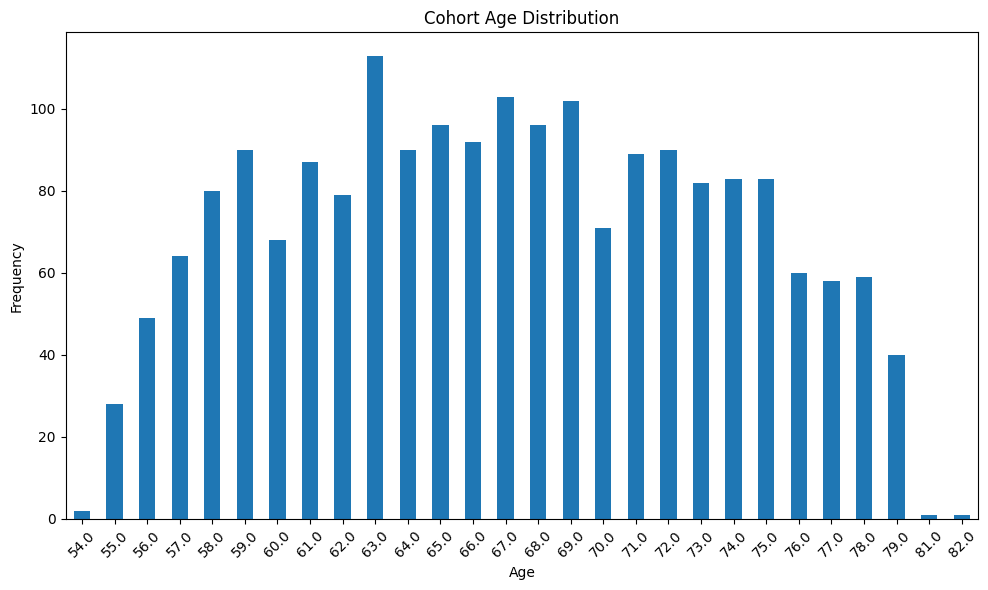

In [50]:
import matplotlib.pyplot as plt
csv_file_path = '/nasdata4/kwonhwi/GraphTransformer/data/cohort_clinical_data_240906.csv' 

df = pd.read_csv(csv_file_path)
df['age'] = df['age'].astype(float)
age_counts = df['age'].value_counts(ascending=True).sort_index()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Cohort Age Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

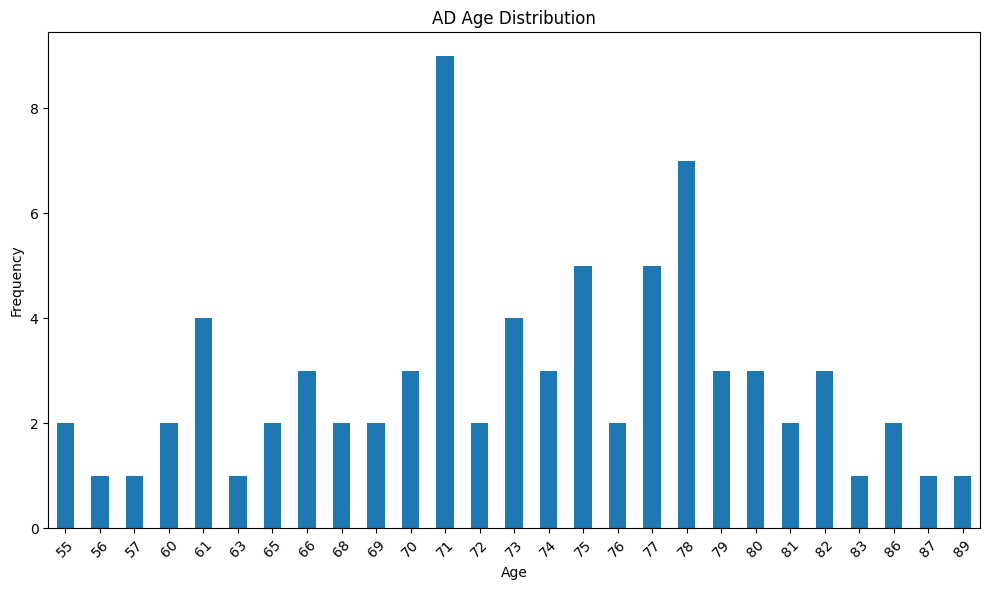

In [54]:
csv_file_path = '/nasdata4/kwonhwi/GraphTransformer/data/AD_age.csv' 

df = pd.read_csv(csv_file_path)
df['AGE'] = df['AGE'].astype(int)
age_counts = df['AGE'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('AD Age Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()